In [439]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from supplemental_russian import REGION_CODES, GOVERNMENT_CODES
os.chdir(r"C:\Users\User\OneDrive\Документы\Kaggle\Russian Car Plates Prices Prediction")

In [440]:
def convert_dates(df):
    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month.map(
        {
            1: "january",
            2: "february",
            3: "march",
            4: "april",
            5: "may",
            6: "june",
            7: "july",
            8: "august",
            9: "september",
            10: "october",
            11: "november",
            12: "december"
        }
    )
    df["day_week"] = df["date"].dt.dayofweek.map(
        {
            0: "monday",
            1: "tuesday",
            2: "wednesday",
            3: "thursday",
            4: "friday",
            5: "saturday",
            6: "sunday"
        }
    )
    return df
    

In [441]:
def reverse_codes(d):
    dict = {}
    for v, k in REGION_CODES.items():
        for key in k:
            dict[key] = v
    return dict
regions = reverse_codes(REGION_CODES)

In [442]:
def extract_government_info(row):
    for ident, info in GOVERNMENT_CODES.items():
        if (row["letters"] == ident[0]) and (ident[1][0] <= int(row["numbers"]) <= ident[1][1]) and (row["region"] == ident[2]):
            return info[0], info[1], info[2], info[3]
        
    return "not governmental", 0, 0, 0

In [443]:
def extract_plate_info(df):
    df[["dept_name", "forb_buy", "adv_road", "significance"]] = df[["letters", "numbers", "region"]].apply(extract_government_info, axis=1, result_type="expand")
    df["region"] = df["region"].map(regions)
    

In [445]:
def wrangle(path):
    df = pd.read_csv("train.csv")
    convert_dates(df)
    extract_plate(df)
    extract_plate_info(df)
    return df

In [446]:
df = wrangle("train.csv")
df

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance
0,1,X059CP797,2024-12-26 00:00:00,65000,2024,december,thursday,XCP,059,Москва,not governmental,0,0,0
1,2,Y800MH790,2024-07-12 21:31:37,100000,2024,july,friday,YMH,800,Московская область,not governmental,0,0,0
2,3,A212TX77,2024-04-18 00:00:00,290000,2024,april,thursday,ATX,212,Москва,not governmental,0,0,0
3,4,P001AY199,2025-01-03 00:27:15,680000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0
4,5,P001AY199,2025-01-10 09:32:41,750000,2025,january,friday,PAY,001,Москва,not governmental,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000,2025,january,wednesday,XPP,023,Москва,not governmental,0,0,0
51631,51632,M004KA161,2025-01-31 00:00:00,1600000,2025,january,friday,MKA,004,Ростовская область,not governmental,0,0,0
51632,51633,E888EB199,2025-02-06 00:00:00,850000,2025,february,thursday,EEB,888,Москва,not governmental,0,0,0
51633,51634,X023XK77,2024-04-24 11:30:07,150000,2024,april,wednesday,XXK,023,Москва,not governmental,0,0,0


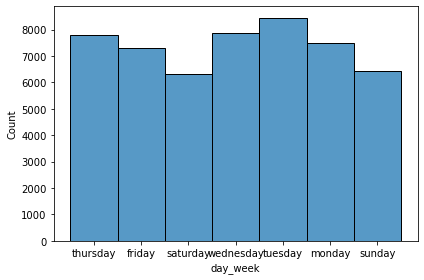

In [12]:
sns.histplot(df["day_week"])
plt.tight_layout()

<AxesSubplot:xlabel='year'>

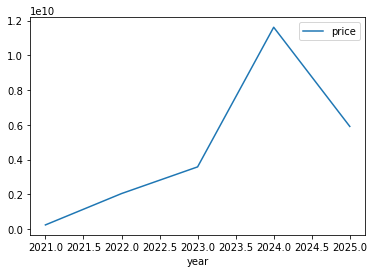

In [18]:
df.groupby("year").agg({"price": "sum"}).plot()

Text(0.5, 1.0, 'Total value sold by month')

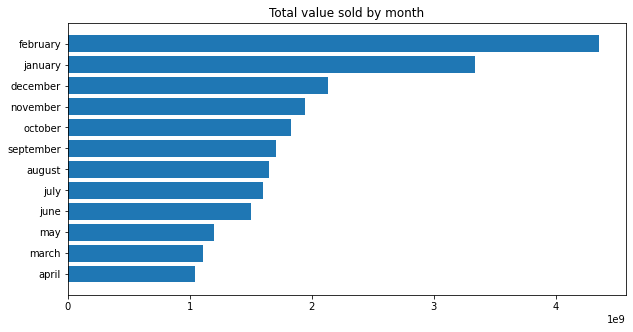

In [48]:
sorted_month = df.groupby("month").agg({"price": "sum"}).reset_index().sort_values("price", ascending=True)
fig, ax = plt.subplots(figsize=(10, 5))
plt.barh(width=sorted_month["price"], y=sorted_month["month"])
plt.title("Total value sold by month")

In [101]:
duplicated_plates = df[df["plate"].duplicated(keep=False)]
duplicated_plates

,id,plate,date,price,year,month,day_week
3,4,P001AY199,2025-01-03 00:27:15,680000,2025,january,friday
4,5,P001AY199,2025-01-10 09:32:41,750000,2025,january,friday
20,21,K063KK190,2023-07-30 12:07:31,530000,2023,july,sunday
21,22,K063KK190,2024-10-01 00:00:00,450000,2024,october,tuesday
32,33,M313MM99,2024-06-30 00:00:00,3250000,2024,june,sunday
...,...,...,...,...,...,...,...
51594,51595,C300KA977,2024-10-05 23:58:47,160000,2024,october,saturday
51595,51596,C300KA977,2024-11-17 12:40:59,150000,2024,november,sunday
51596,51597,C300KA977,2025-01-04 11:39:20,100000,2025,january,saturday
51629,51630,X023PP797,2024-03-25 10:38:34,155000,2024,march,monday


<AxesSubplot:>

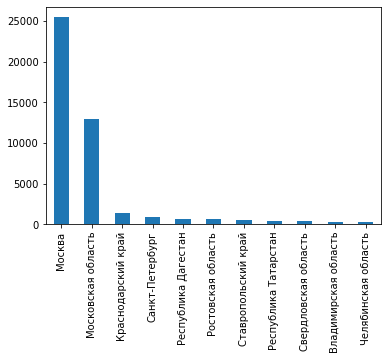

In [398]:
df["region"].value_counts().head(11).plot(kind="bar")

In [438]:
df["dept_name"].nunique()

60

<AxesSubplot:>

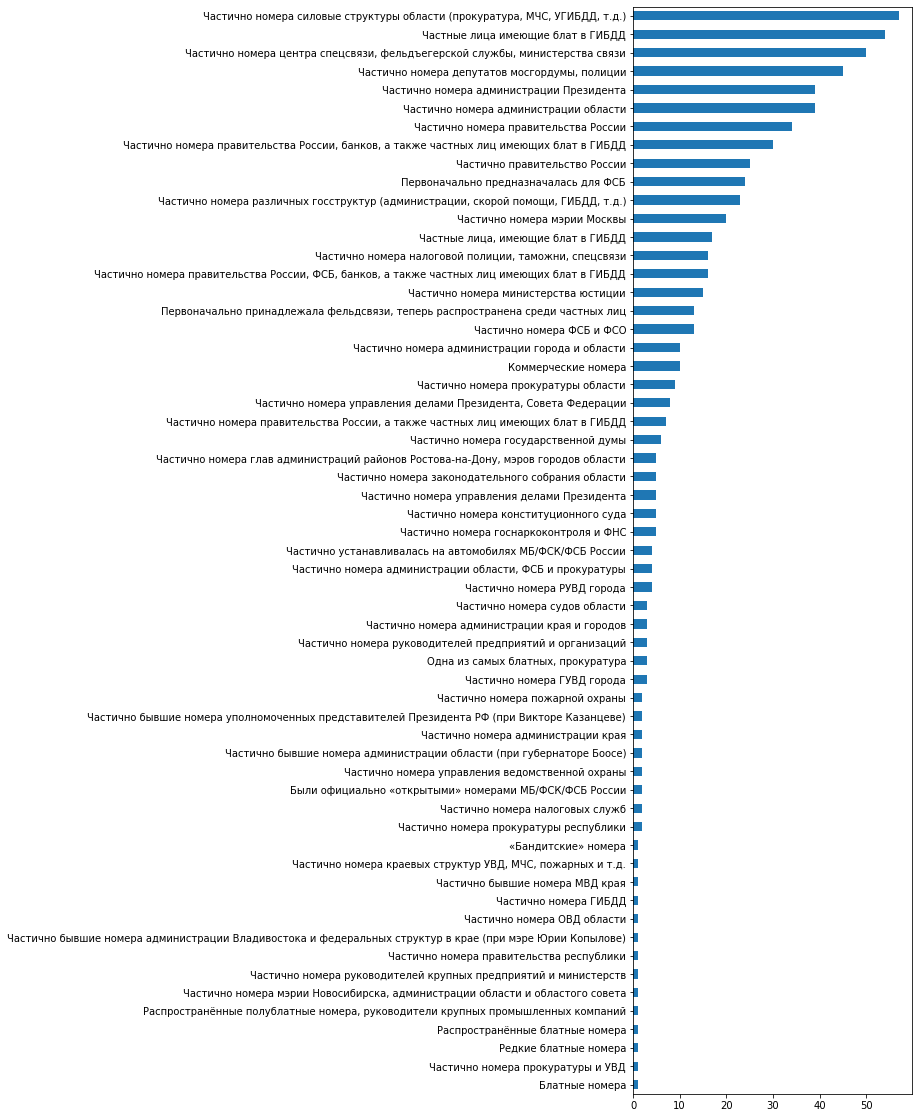

In [413]:
fig, ax = plt.subplots(figsize=(5, 20))
df["dept_name"].value_counts(sort=True, ascending=True).drop("not governmental").plot(kind="barh")

In [427]:
df["numbers_contribution"] = df.groupby("numbers")["price"].transform("mean")

In [433]:
df["letters_contribution"] = df.groupby("numbers")["price"].transform("mean")

In [432]:
df.sort_values("numbers_contribution", ascending=False).head(10)

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance,numbers_contribution
35000,35001,O293OO77,2023-06-01,760000,2023,june,thursday,OOO,293,Москва,Первоначально предназначалась для ФСБ,0,0,1,6.042083e+06
2479,2480,O293OO161,2024-11-17,400000,2024,november,sunday,OOO,293,Ростовская область,not governmental,0,0,0,6.042083e+06
15790,15791,K293TO797,2024-11-27,70000,2024,november,wednesday,KTO,293,Москва,not governmental,0,0,0,6.042083e+06
26853,26854,M293MK07,2024-10-23,50000,2024,october,wednesday,MMK,293,Кабардино-Балкарская Республика,not governmental,0,0,0,6.042083e+06
39534,39535,X293AM797,2023-01-19,300000,2023,january,thursday,XAM,293,Москва,not governmental,0,0,0,6.042083e+06
6982,6983,X293XX50,2025-01-13,600000,2025,january,monday,XXX,293,Московская область,not governmental,0,0,0,6.042083e+06
47086,47087,Y293TY193,2024-02-10,70000000,2024,february,saturday,YTY,293,Краснодарский край,not governmental,0,0,0,6.042083e+06
43496,43497,M293AA550,2024-12-16,30000,2024,december,monday,MAA,293,Московская область,not governmental,0,0,0,6.042083e+06
14712,14713,M293AX550,2024-09-11,50000,2024,september,wednesday,MAX,293,Московская область,not governmental,0,0,0,6.042083e+06
27981,27982,E293EE178,2024-04-06,100000,2024,april,saturday,EEE,293,Санкт-Петербург,not governmental,0,0,0,6.042083e+06


In [434]:
df.sort_values("letters_contribution", ascending=False).head(10)

,id,plate,date,price,year,month,day_week,letters,numbers,region,dept_name,forb_buy,adv_road,significance,numbers_contribution,letters_contribution
35000,35001,O293OO77,2023-06-01,760000,2023,june,thursday,OOO,293,Москва,Первоначально предназначалась для ФСБ,0,0,1,6.042083e+06,6.042083e+06
2479,2480,O293OO161,2024-11-17,400000,2024,november,sunday,OOO,293,Ростовская область,not governmental,0,0,0,6.042083e+06,6.042083e+06
15790,15791,K293TO797,2024-11-27,70000,2024,november,wednesday,KTO,293,Москва,not governmental,0,0,0,6.042083e+06,6.042083e+06
26853,26854,M293MK07,2024-10-23,50000,2024,october,wednesday,MMK,293,Кабардино-Балкарская Республика,not governmental,0,0,0,6.042083e+06,6.042083e+06
39534,39535,X293AM797,2023-01-19,300000,2023,january,thursday,XAM,293,Москва,not governmental,0,0,0,6.042083e+06,6.042083e+06
6982,6983,X293XX50,2025-01-13,600000,2025,january,monday,XXX,293,Московская область,not governmental,0,0,0,6.042083e+06,6.042083e+06
47086,47087,Y293TY193,2024-02-10,70000000,2024,february,saturday,YTY,293,Краснодарский край,not governmental,0,0,0,6.042083e+06,6.042083e+06
43496,43497,M293AA550,2024-12-16,30000,2024,december,monday,MAA,293,Московская область,not governmental,0,0,0,6.042083e+06,6.042083e+06
14712,14713,M293AX550,2024-09-11,50000,2024,september,wednesday,MAX,293,Московская область,not governmental,0,0,0,6.042083e+06,6.042083e+06
27981,27982,E293EE178,2024-04-06,100000,2024,april,saturday,EEE,293,Санкт-Петербург,not governmental,0,0,0,6.042083e+06,6.042083e+06


In [437]:
df["region"].nunique()

88